<a href="https://colab.research.google.com/github/MamatkulovBunyodbek1999/My-portfoilio-samples/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Classification

### Determining customer churn

One of the most common problems in business. Determining the mood of the client.

If the business owner can predict in advance that the customer will not return, will not use the product or service again, he can act to retain the customer and change his mind.

In this practice, we predict whether a customer will stay or not by analyzing the data of online store customers.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics 


## We read the data.

Note that this time the dataset is in excel file format. The file itself consists of 2 separate pages.

In [3]:

# If you have problems opening excel files, install an older (1.2.0) version of the xlrd package.
#pip install xlrd==1.2.0

In [4]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url, sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
df.shape

(5630, 20)


The dataset consists of 20 columns. What each column means is stored on a different page of the above Excel file. Let's see it too:

In [6]:
description = pd.read_excel(url, sheet_name="Data Dict", header=1, usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


Ustun ma'nolarini tarjima qilishni vazifa qilib qoldiraman :)


## We analyze the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   


- The number of rows is 5630
- Some columns have dropped values

In [8]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [9]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000



An important column for us is the ``Churn'' column, which acts as a `label' (ie, the predicted class).

Let's see the ratio of values ​​in this column:

In [10]:
df['Churn'].value_counts()/len(df)*100

0    83.161634
1    16.838366
Name: Churn, dtype: float64


- 4682 customers repurchased (remaining)
- 948 customers left


We derive the ratio:

In [11]:
churn_rate = df['Churn'].value_counts()/len(df)*100

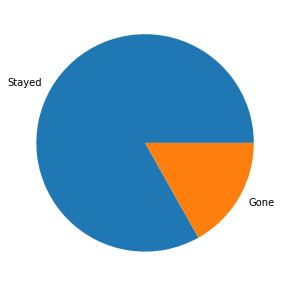

In [12]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Stayed','Gone'])
plt.show()


#### Let's analyze some numerical columns

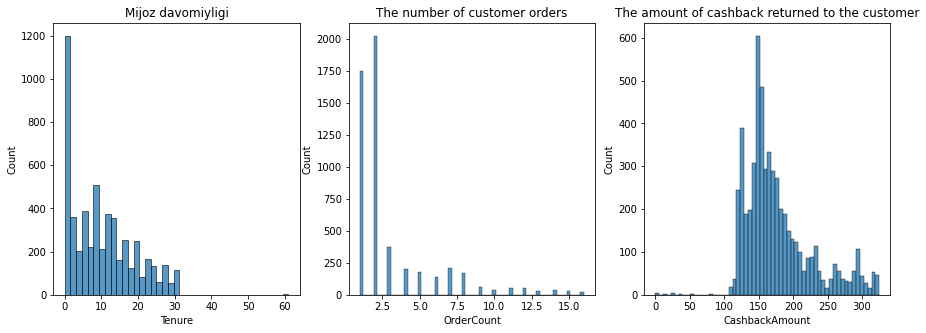

In [13]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Mijoz davomiyligi")

#OrderCount
sns.histplot(x="OrderCount", data=df, ax=axes[1])
axes[1].set_title("The number of customer orders")

# Cashback
sns.histplot(x="CashbackAmount", data=df, ax=axes[2])
axes[2].set_title("The amount of cashback returned to the customer")

plt.show()


#### We analyze categorical columns

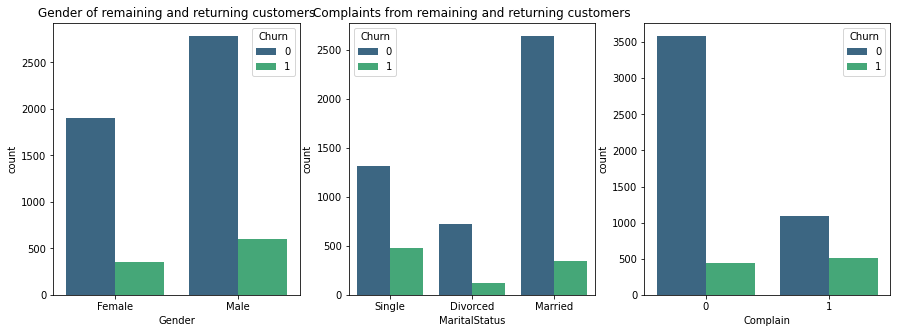

In [14]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Gender of remaining and returning customers")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Marital status of remaining and returning clients")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[1].set_title("Complaints from remaining and returning customers")

plt.show()

In [15]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64


What conclusions can be drawn from the above information?


## Data processing


In [16]:
#df dagi mavjud bo'lmagan qiymatlar soni
print(f"The number of non-existent values: {df.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"The number of non-existent raws: {missing_rows}")
#qatorlar nisbati
print(f"The number of non-existent raws %: {np.round(missing_rows/len(df)*100)}%")

The number of non-existent values: 1856
The number of non-existent raws: 1856
The number of non-existent raws %: 33.0%



33% is too much. But do we use all the columns?

Let's sort some categorical (natbn) columns with high correlation (_which columns to sort is up to you. We're just giving an example_)

In [17]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]

In [18]:
print(f"The number of non-existent values: {data.isnull().sum().sum()}")
#The number of non-existent values
missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"The number of non-existent raws: {missing_rows}")
#qatorlar nisbati
print(f"The number of non-existent raws %: {np.round(missing_rows/len(data)*100)}%")

The number of non-existent values: 571
The number of non-existent raws: 571
The number of non-existent raws %: 10.0%



10% rows value is not available. What you do with these values ​​is up to you.

We will leave these lines for now.

In [19]:
data = data.dropna()
data.shape

(5059, 7)

In [20]:
data['Churn'].value_counts()/len(data)

0    0.839296
1    0.160704
Name: Churn, dtype: float64


## Preparing for ML

In [21]:
# We convert text columns to numbers
encoded = pd.get_dummies(data)
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,1,4.0,1,5.0,159.93,0,0,1,1,0
3,1,0.0,0,3.0,134.07,0,0,1,0,1
4,1,0.0,0,3.0,129.60,0,0,1,0,1
5,1,0.0,1,7.0,139.19,0,0,1,1,0
8,1,13.0,1,2.0,126.83,1,0,0,0,1


In [33]:
X = encoded.drop("Churn", axis=1)
y = encoded['Churn']

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## ML

### Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       849
           1       0.75      0.38      0.50       163

    accuracy                           0.88      1012
   macro avg       0.82      0.68      0.72      1012
weighted avg       0.87      0.88      0.86      1012

Model accuracy: 0.8794466403162056


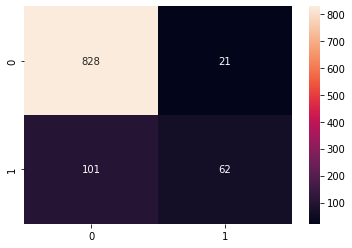

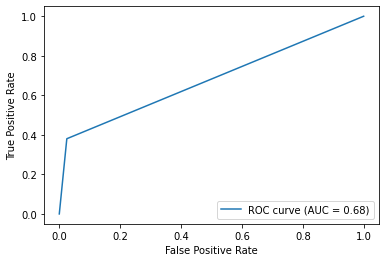

In [36]:
# We create the model (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# We evaluate the model
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred)),
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [45]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



### Support Vector Machines

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       849
           1       0.67      0.31      0.42       163

    accuracy                           0.86      1012
   macro avg       0.77      0.64      0.67      1012
weighted avg       0.85      0.86      0.84      1012

Model accuracy: 0.8636363636363636


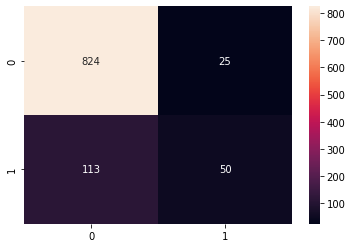

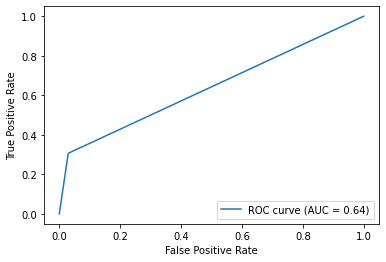

In [50]:
# We create the model (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# We evaluate the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       849
           1       0.67      0.31      0.42       163

    accuracy                           0.86      1012
   macro avg       0.77      0.64      0.67      1012
weighted avg       0.85      0.86      0.84      1012

Model accuracy: 0.8636363636363636


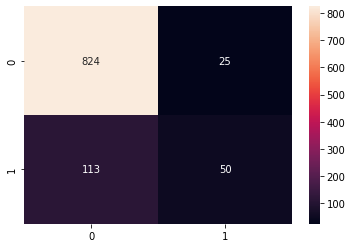

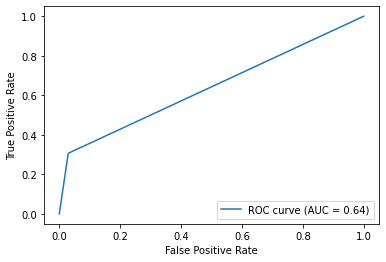

In [51]:
# We create the model (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# We evaluate the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       849
           1       0.85      0.90      0.87       163

    accuracy                           0.96      1012
   macro avg       0.92      0.93      0.92      1012
weighted avg       0.96      0.96      0.96      1012

Model accuracy: 0.958498023715415


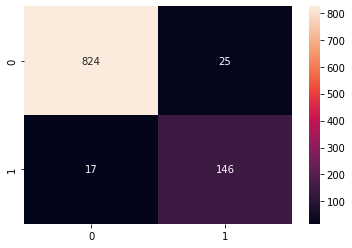

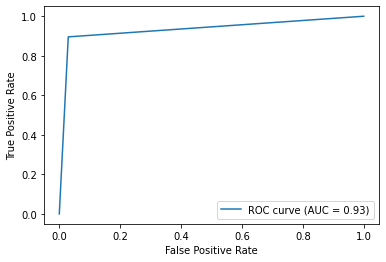

In [52]:

# We create the model (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# We evaluate the model
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

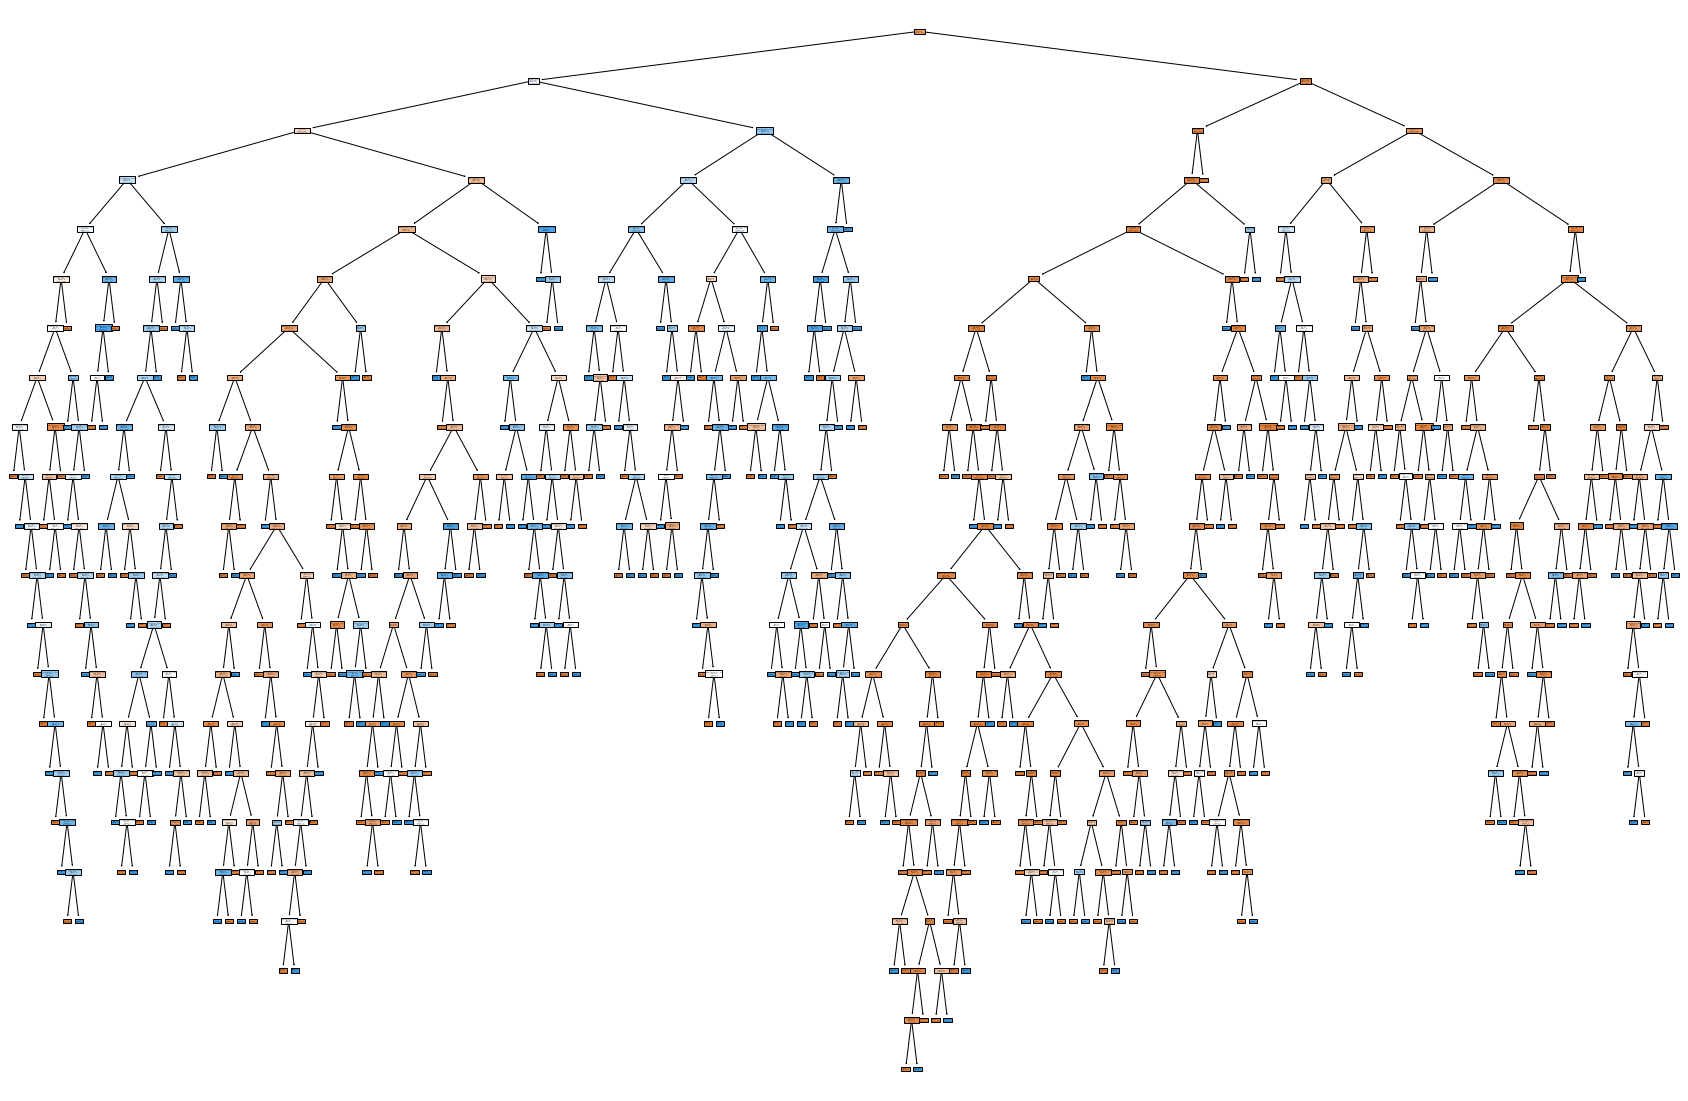

In [53]:
cols = encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

### Random Forest

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       849
           1       0.86      0.75      0.80       163

    accuracy                           0.94      1012
   macro avg       0.91      0.87      0.88      1012
weighted avg       0.94      0.94      0.94      1012

Model accuracy: 0.9407114624505929


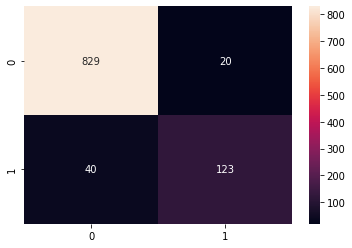

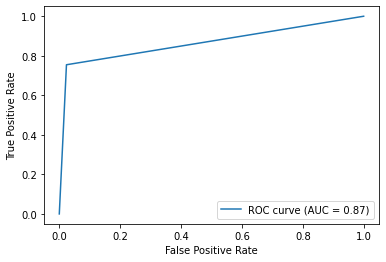

In [54]:

# We create the model (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# We evaluate the model
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### XGBoost

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       849
           1       0.70      0.52      0.59       163

    accuracy                           0.89      1012
   macro avg       0.81      0.74      0.76      1012
weighted avg       0.88      0.89      0.88      1012

Model accuracy: 0.8863636363636364


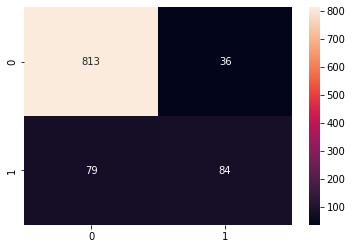

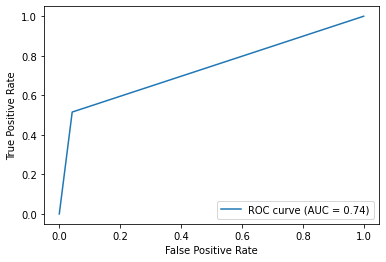

In [55]:
# We create the model (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# We evaluate the model
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()